# More examples for clustering

### Helper functions

In [1]:
import numpy as np

def load_labeled_data(filename):
    X = []
    y = []
    with open(filename) as fp:
        for line in fp:
            temp = line.split()
            X.append(temp[:-1])
            y.append(temp[-1])
    return np.array(X, dtype = float), np.array(y, dtype = float)

def load_unlabeled_data(filename):
    X = []
    with open(filename) as fp:
        for line in fp:
            X.append(line.split())
    return np.array(X, dtype = float)

In [2]:
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabaz_score

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

def plot_unlabeled(X):
    fig = plt.figure(figsize = (10,10))
    plt.scatter(X[:,0], X[:,1],s=10)
    plt.show()
    return

def plot_labeled(X,y):
    fig = plt.figure(figsize = (10,10))
    cmap = plt.get_cmap('PiYG')
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   cmap=cmap, label=cl)
    plt.legend()
    plt.show()
    return

def plot_3D_unlabeled(X):    
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:,0], X[:,1], X[:,2], marker='o')
    plt.show()
    return

def plot_3D_labeled(X,y):    
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(111, projection='3d')

    
    cmap = plt.get_cmap('PiYG')
    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(X[y == cl, 0], X[y == cl, 1], X[y == cl, 2],
                   cmap=cmap, label=cl)
    plt.legend()
    plt.show()
    return

def plot_MNIST(X):    
    plt.imshow(X.reshape(28, 28))
    plt.show()
    return

### Datasets provided to you
* data/labeled_Aggregation.txt
* data/labeled_Compound.txt
* data/labeled_D31.txt
* data/labeled_Spiral.txt
* data/unlabeled_ConfLongDemo.txt
* data/unlabeled_Unbalanced.txt


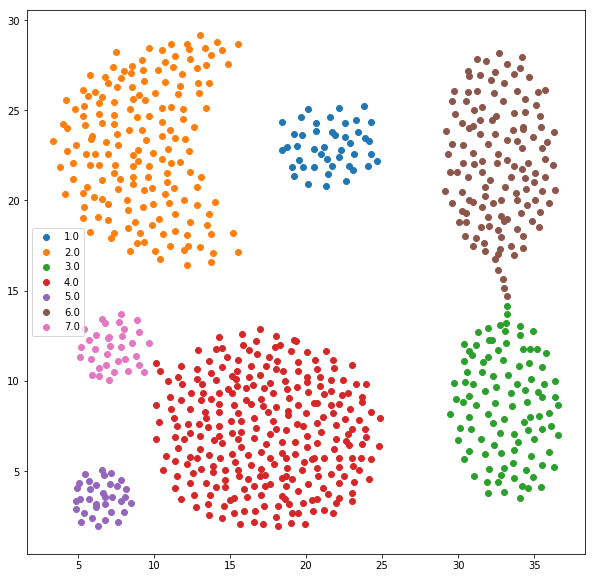

In [3]:
# Load data
X,y = load_labeled_data("data/labeled_Aggregation.txt")
plot_labeled(X,y)

In [4]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans, MeanShift
from sklearn.cluster import DBSCAN

In [5]:
# k-means with 7 clusters


In [6]:
# Agglomerative Clustering


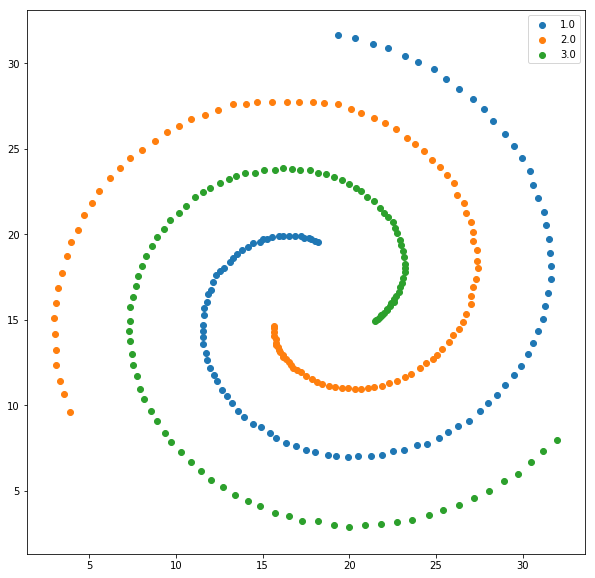

In [7]:
# Different dataset
X,y = load_labeled_data("data/labeled_Spiral.txt")
plot_labeled(X,y)

In [8]:
# DBSCAN


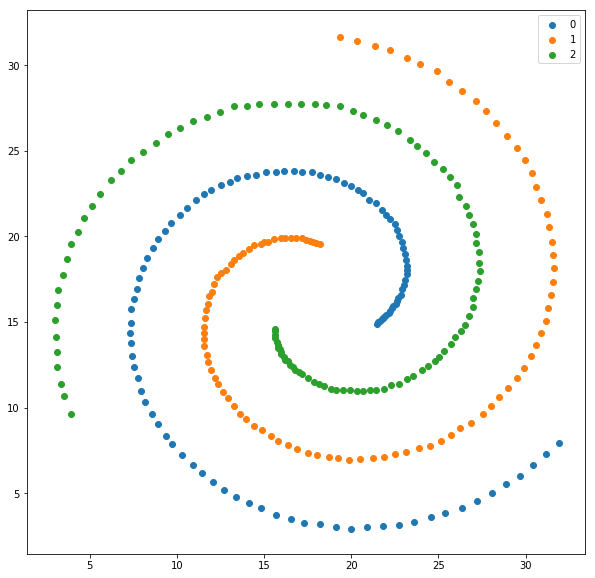

In [9]:
# tuning DBSCAN hyper parameters
model = DBSCAN(min_samples = 1, eps = 3)
model.fit(X)
labels = model.labels_
plot_labeled(X,labels)

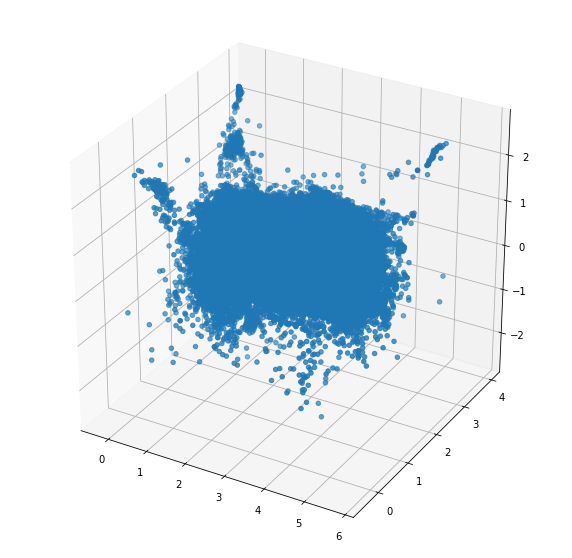

In [10]:
# 3D dataset
X = load_unlabeled_data("data/unlabeled_ConfLongDemo.txt")
plot_3D_unlabeled(X)

In [11]:
# clustering with k-means


# Short introduction to dimension reduction


Dimension reduction: reducing the dimension of the feature space for analysis or visualization

* Feature Elimination: reduce the feature space by eliminating features
* Feature Extraction: create “new” features, where each “new” feature is a combination of each of “old” features in a specific way. We keep as many of the new features as we want, and drop the “least important ones.”

### Principal Component Analysis

![](images/PCA_illustration.png)

Tutorial: https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c

In [12]:
# PCA example with the 3D dataset
from sklearn.decomposition import PCA


In [13]:
print(model.explained_variance_ratio_)

AttributeError: 'DBSCAN' object has no attribute 'explained_variance_ratio_'

In [ ]:
print(model.components_)

### MNIST Dataset

Dataset of handwritten digits. Each datapoint is a 28 * 28 image
![](images/MNIST.png)

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/")
X = mnist.train.images[:5000]
y = mnist.train.labels[:5000]

In [ ]:
X.shape

In [ ]:
plot_MNIST(X[100])

In [ ]:
# MNIST with PCA (50 components)
from sklearn.decomposition import PCA


In [ ]:
print(model.explained_variance_ratio_)
print(sum(model.explained_variance_ratio_[:30]))

## Other methods
* https://towardsdatascience.com/dimensionality-reduction-toolbox-in-python-9a18995927cd
* https://colah.github.io/posts/2014-10-Visualizing-MNIST/

In [ ]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2, n_neighbors = 5)
X_transformed = model.fit_transform(X)
plot_labeled(X_transformed,y)

In [ ]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2,learning_rate=300,perplexity = 30, verbose = 3)
X_transformed = model.fit_transform(X)
plot_labeled(X_transformed,y)

# Q&A Session